In [66]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import yellowbrick
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
import seaborn as sns; sns.set()
from collections import Counter
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, FastICA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
ds = pd.read_csv("C:/Users/tvpia/Desktop/Final project/final-project/your-project/Datasets/ds_flagged.csv")
pd.set_option('max_columns', 150)

In [3]:
ds.drop(columns="Unnamed: 0",inplace=True)

Using unsupervising learning and K-means model, let's cluster our data.
I will proceed to do so in 2 different ways.

The first way is to use only psychological features to determine cluster. (it may be more interesting for later on exploratory analysis).

The second way is to use all the features possible (since there are too many countries (> 160) to label encode efficiently. I will divide between English speaking and non English speaking countries.

As a first step, let's standard scale the columns that need to (age and accuracy)

In [4]:
ds_std = ds.copy()

In [5]:
features = ds_std[['age','accuracy']]

# Standardize features
scaler = StandardScaler()
features_std = scaler.fit_transform(features)

ds_std[['age','accuracy']]=features_std

Now let's add the results of the dirty dozens tests in the table

In [7]:
ds_std["DDPScale"]= round(ds_std.iloc[:,10:14].sum(axis=1)*5/100,2)

In [8]:
ds_std["DDMScale"]= round(ds_std.iloc[:,18:22].sum(axis=1)*5/100,2)

In [9]:
ds_std.head(1)

,HSNS1,HSNS2,HSNS3,HSNS4,HSNS5,HSNS6,HSNS7,HSNS8,HSNS9,HSNS10,DDP1,DDP2,DDP3,DDP4,DDN1,DDN2,DDN3,DDN4,DDM1,DDM2,DDM3,DDM4,age,gender,accuracy,country,HSNScale,HSNS1_flag,HSNS2_flag,HSNS3_flag,HSNS4_flag,HSNS5_flag,HSNS6_flag,HSNS7_flag,HSNS8_flag,HSNS9_flag,HSNS10_flag,DDP1_flag,DDP2_flag,DDP3_flag,DDP4_flag,DDN1_flag,DDN2_flag,DDN3_flag,DDN4_flag,DDM1_flag,DDM2_flag,DDM3_flag,DDM4_flag,DDPScale,DDMScale
0,2,4,5,1,4,5,4,3,3,2,1,1,4,4,2,1,1,1,1,2,2,1,1.03349,2,0.900357,PT,0.62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.5,0.3


## 1) Clustering with only psychological features


Lets use the elbow method to find the optimal number of clusters

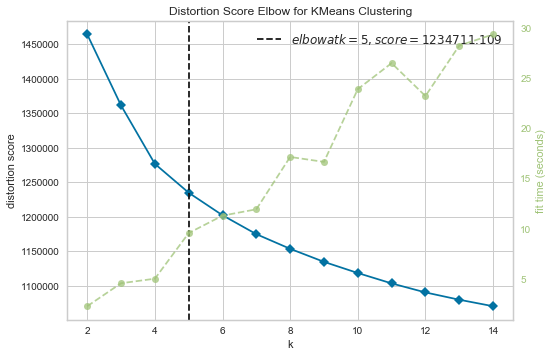

In [11]:
features = ds_std.drop(columns=["age","gender","accuracy","country"],axis=1)


model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,15))
visualizer.fit(features)
visualizer.poof()

In [13]:
#lets try with k=5 first as the Elbow test tells us so
n_clusters = 5
cluster = KMeans(n_clusters=n_clusters, random_state=0, n_jobs=-1)
features = ds_std.drop(columns=["age","gender","accuracy","country"],axis=1)


model = cluster.fit(features)


preds = cluster.fit_predict(features)
centers = cluster.cluster_centers_
print(centers)

score = silhouette_score (features, preds, metric='euclidean')
print (f"For n_clusters = {n_clusters}, silhouette score is {score})")

[[3.51244015e+00 1.92657966e+00 2.83100178e+00 2.77457516e+00
  3.61205521e+00 4.14327293e+00 2.62041123e+00 3.37667825e+00
  3.36494226e+00 2.98413295e+00 3.61637405e+00 3.18157919e+00
  3.77532626e+00 4.09144681e+00 3.16608769e+00 2.55224862e+00
  2.87616186e+00 2.45685851e+00 3.44380809e+00 3.93549901e+00
  3.31921885e+00 2.95239884e+00 5.63239132e-01 2.91052483e-03
  7.04159234e-03 4.13106751e-03 6.38437705e-03 3.28607642e-03
  4.50661910e-03 4.97605859e-03 3.47385222e-03 3.84940381e-03
  2.81663694e-03 2.15942165e-03 4.03717961e-03 3.19218853e-03
  2.62886114e-03 8.16824711e-03 7.60491973e-03 6.29048916e-03
  4.97605859e-03 2.34719745e-03 1.59609426e-03 1.78387006e-03
  3.09830063e-03 7.33236316e-01 6.82546240e-01]
 [3.72113355e+00 3.66912873e+00 3.73032861e+00 2.40631595e+00
  2.60189931e+00 3.75173349e+00 3.80336147e+00 2.73914682e+00
  3.80637624e+00 1.93088634e+00 1.75218571e+00 1.76183298e+00
  2.28723244e+00 3.47166114e+00 3.89078987e+00 3.33592101e+00
  2.82325897e+00 2.298

In [17]:
#let's apply this label to the dataframe

ds['label_psy_only'] = model.labels_

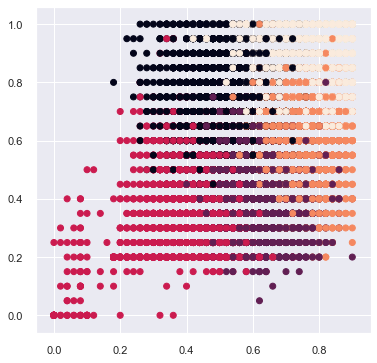

In [49]:
#lets visualize the cluster in a scatter plot


# Your code here:
plt.figure(figsize=(6,6))
plt.scatter(ds_std.HSNScale, ds_std.DDPScale, c=ds.label_psy_only) 
plt.show()



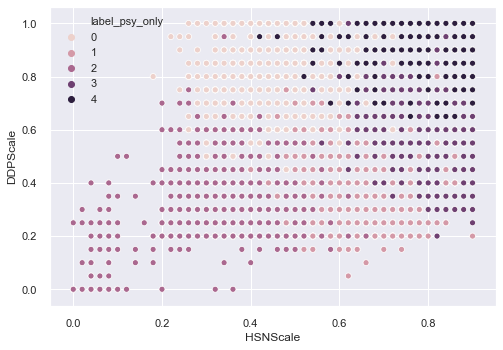

In [24]:


X = ds_std.HSNScale
y = ds_std.DDPScale


palette = sns.cubehelix_palette(5)
sns.scatterplot(X, y, hue = ds['label_psy_only'], palette = palette)
plt.show()



In [74]:
ds_plot = ds.copy()
ds_plot["DDPScale"]= round(ds_plot.iloc[:,10:14].sum(axis=1)*5/100,2)
ds_plot["DDNScale"]= round(ds_plot.iloc[:,14:18].sum(axis=1)*5/100,2)
ds_plot["DDMScale"]= round(ds_plot.iloc[:,18:22].sum(axis=1)*5/100,2)

In [73]:
ds.head(1)

,HSNS1,HSNS2,HSNS3,HSNS4,HSNS5,HSNS6,HSNS7,HSNS8,HSNS9,HSNS10,DDP1,DDP2,DDP3,DDP4,DDN1,DDN2,DDN3,DDN4,DDM1,DDM2,DDM3,DDM4,age,gender,accuracy,country,HSNScale,HSNS1_flag,HSNS2_flag,HSNS3_flag,HSNS4_flag,HSNS5_flag,HSNS6_flag,HSNS7_flag,HSNS8_flag,HSNS9_flag,HSNS10_flag,DDP1_flag,DDP2_flag,DDP3_flag,DDP4_flag,DDN1_flag,DDN2_flag,DDN3_flag,DDN4_flag,DDM1_flag,DDM2_flag,DDM3_flag,DDM4_flag,label_psy_only,label_all_features
0,2,4,5,1,4,5,4,3,3,2,1,1,4,4,2,1,1,1,1,2,2,1,37,2,98,PT,0.62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2


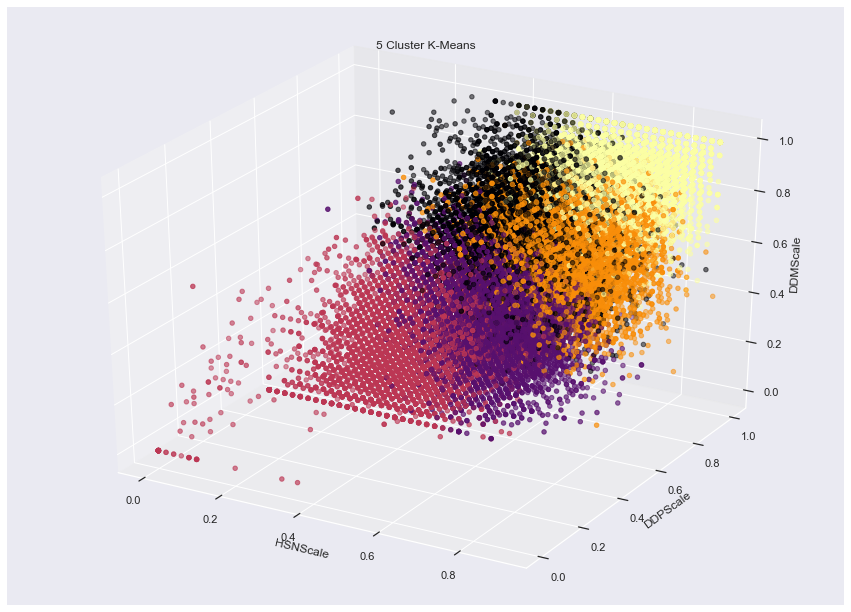

In [98]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
fig.set_size_inches(15,11)
ax = fig.add_subplot(111, projection='3d')


ax.scatter(ds_plot["HSNScale"],ds_plot["DDPScale"],ds_plot["DDMScale"],\
          c=ds["label_psy_only"],cmap="inferno")

ax.set_xlabel('HSNScale')
ax.set_ylabel('DDPScale')
ax.set_zlabel('DDMScale')
plt.title('5 Cluster K-Means')

plt.show()

## 2) Clustering with all the features

First, let's define English and non English speaking countries

In [26]:
print(Counter(ds_std.country))
#I will focus on US, GB, AU and NZ as they are the English speaking countries and they all adopt a clear capital driven economy.

Counter({'US': 27370, 'GB': 6090, 'CA': 3721, 'AU': 2956, 'DE': 819, 'IN': 648, 'SE': 618, 'PH': 547, 'PL': 519, 'BR': 507, 'NL': 480, 'NZ': 436, 'IE': 401, 'FI': 377, 'SG': 373, 'FR': 345, 'RO': 317, 'NO': 313, 'MX': 309, 'HR': 280, 'ZA': 278, 'DK': 230, 'ID': 222, 'IT': 212, 'BE': 206, 'ES': 188, 'RS': 168, 'GR': 167, 'PT': 157, 'MY': 156, 'HU': 129, 'AT': 115, 'BG': 114, 'RU': 113, 'CH': 109, 'TR': 104, 'CZ': 101, 'HK': 100, 'AR': 99, 'SI': 99, 'JP': 88, 'EE': 87, 'CN': 85, 'IL': 82, 'LT': 81, 'TH': 79, 'PK': 73, 'KR': 69, 'CL': 66, 'CO': 64, 'AE': 61, 'SK': 55, 'IS': 52, 'BA': 50, 'LV': 50, 'TT': 49, 'VN': 44, 'EU': 44, 'PR': 43, 'EG': 39, 'PE': 38, 'SA': 37, 'BS': 35, 'UA': 33, 'NG': 32, 'LB': 31, 'TW': 30, 'VE': 29, 'JM': 27, 'CR': 26, 'MT': 25, 'KE': 22, 'MK': 22, 'CY': 20, 'BD': 19, 'QA': 16, 'KW': 16, 'PA': 16, 'LK': 15, 'EC': 15, 'LU': 15, 'MA': 15, 'DO': 14, 'IR': 14, 'BN': 11, 'AP': 11, 'GE': 11, 'MU': 11, 'JO': 10, 'NP': 10, 'MV': 9, 'ME': 9, 'GU': 9, 'OM': 8, 'UY': 8, 'SV

In [30]:
eng= ["US","GB","AU","NZ"]
ds_std["English_speaking"]=np.where(ds_std.country.isin(eng),0,1)

In [44]:
ds_std.head(1)

,HSNS1,HSNS2,HSNS3,HSNS4,HSNS5,HSNS6,HSNS7,HSNS8,HSNS9,HSNS10,DDP1,DDP2,DDP3,DDP4,DDN1,DDN2,DDN3,DDN4,DDM1,DDM2,DDM3,DDM4,age,gender,accuracy,country,HSNScale,HSNS1_flag,HSNS2_flag,HSNS3_flag,HSNS4_flag,HSNS5_flag,HSNS6_flag,HSNS7_flag,HSNS8_flag,HSNS9_flag,HSNS10_flag,DDP1_flag,DDP2_flag,DDP3_flag,DDP4_flag,DDN1_flag,DDN2_flag,DDN3_flag,DDN4_flag,DDM1_flag,DDM2_flag,DDM3_flag,DDM4_flag,DDPScale,DDMScale,English_speaking
0,2,4,5,1,4,5,4,3,3,2,1,1,4,4,2,1,1,1,1,2,2,1,1.03349,2,0.900357,PT,0.62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.5,0.3,1


let's now proceed with K-means clustering

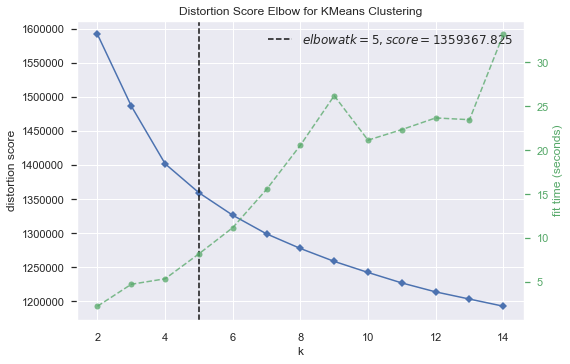

In [32]:
#I will still drop the country feature since we have the feature English or non English speaking country
features = ds_std.drop(columns=["country"],axis=1)


model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,15))
visualizer.fit(features)
visualizer.poof()

In [46]:
#lets try with k=5 first as the Elbow test tells us so
n_clusters = 5
cluster = KMeans(n_clusters=n_clusters, random_state=0, n_jobs=-1)
features = ds_std.drop(columns=["country"],axis=1)


model = cluster.fit(features)


preds = cluster.fit_predict(features)
centers = cluster.cluster_centers_
print(centers)

score = silhouette_score (features, preds, metric='euclidean')
print (f"For n_clusters = {n_clusters}, silhouette score is {score})")

[[ 4.28692197e+00  3.89432750e+00  4.01614676e+00  3.28421676e+00
   3.50536816e+00  4.25927805e+00  4.13035760e+00  3.73750951e+00
   4.26883084e+00  2.69160538e+00  2.76413898e+00  2.65905825e+00
   3.31321329e+00  4.06247358e+00  4.40130189e+00  3.93253868e+00
   3.79034576e+00  3.26891538e+00  3.54383295e+00  4.05782399e+00
   3.68306704e+00  2.97573759e+00 -1.50226610e-01  1.36774030e+00
  -1.79143027e-01  7.07659143e-01  1.09899400e-03  1.01445600e-03
   1.60622200e-03  3.63513399e-03  3.12790599e-03  4.31143799e-03
   1.26807000e-03  1.01445600e-03  1.35260800e-03  1.69076000e-03
   2.62067799e-03  5.57950799e-03  2.78975399e-03  2.95882999e-03
   2.87429199e-03  3.88874799e-03  3.29698199e-03  3.38151999e-03
   2.53613999e-03  1.60622200e-03  1.77529800e-03  2.36706400e-03
   6.39944205e-01  7.13023079e-01  3.24118691e-01]
 [ 3.50597535e+00  1.92443775e+00  2.82723252e+00  2.76663216e+00
   3.60186318e+00  4.13907970e+00  2.61748377e+00  3.36670744e+00
   3.35776795e+00  2.9721

In [47]:
#let's apply this label to the dataframe

ds['label_all_features'] = model.labels_

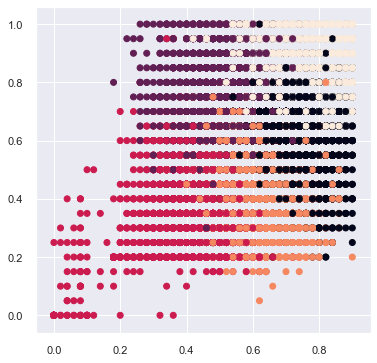

In [48]:
#lets visualize the cluster in a scatter plot


# Your code here:
plt.figure(figsize=(6,6))
plt.scatter(ds_std.HSNScale, ds_std.DDPScale, c=ds.label_all_features) 
plt.show()



## 3) Labeling after PCA

In [57]:
# Load the data

features = ds_std.drop(columns="country",axis=1)


# Create a PCA that will retain 99% of variance
pca = PCA(n_components=0.99, whiten=True)
# ica = FastICA(n_components=0.99, whiten=True)

# Conduct PCA
features_pca = pca.fit_transform(features)

# Show results
print("Original number of features:", features.shape[1])
print("Reduced number of features:", features_pca.shape[1])

#the features have no more meanings but the relationship between the points is still the same

Original number of features: 51
Reduced number of features: 25


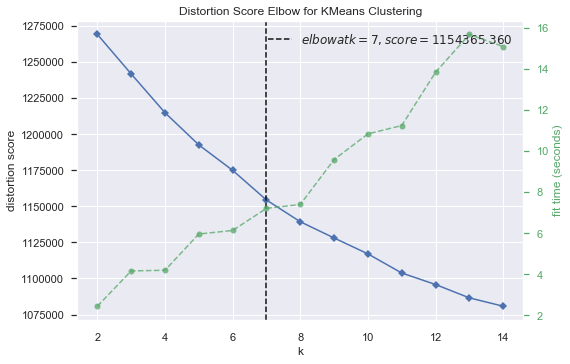

In [58]:
#Doing the Kelbow test after PCA


model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,15))
visualizer.fit(features_pca)
visualizer.poof()

In [59]:
#lets try with k=5 first as the Elbow test tells us so
n_clusters = 5
cluster = KMeans(n_clusters=n_clusters, random_state=0, n_jobs=-1)



model = cluster.fit(features_pca)


preds = cluster.fit_predict(features_pca)
centers = cluster.cluster_centers_
print(centers)

score = silhouette_score (features_pca, preds, metric='euclidean')
print (f"For n_clusters = {n_clusters}, silhouette score is {score})")

[[ 6.66160785e-02 -1.14371248e-01  1.59104333e-01 -7.01981535e-02
  -6.16233831e-03 -3.54135456e-01 -3.01399407e-01 -2.45702587e-01
  -9.12628270e-02 -1.00379289e-01 -1.15211100e-01  9.67502852e-02
   1.90303772e-01  3.72639466e-01  1.75183385e-01  1.73946820e-01
  -4.86914051e-02  1.38241659e-02 -1.60303494e-01  3.10507713e-02
   1.71224000e-02 -4.30481719e-01  1.27386195e-01 -1.67711988e-01
  -7.34498788e-01]
 [ 1.20152408e-01 -8.25843228e-02 -1.67706559e-01 -2.07941366e-03
  -3.08737962e-01 -7.79544643e-02 -6.13506012e-02 -1.31785891e-01
   4.62898441e-01  2.31772705e+00 -5.50092698e-01  2.44194854e-02
   3.02161478e-01 -5.81893066e-01  5.64575529e-02 -4.34274662e-01
   2.72506726e-01  6.18838700e-02  2.35758540e-02  1.53723034e-01
  -1.78325616e-02 -1.41524399e-01  7.65527795e-02 -4.12107090e-02
   2.35562586e-01]
 [ 4.07727412e-02 -2.67327157e-01  1.37723118e-02  3.24061688e-01
   7.48136558e-02  8.15477870e-02 -2.16816136e-01  6.15916254e-02
   6.96503769e-03 -2.32801017e-01 -9.5

In [60]:
#let's apply this label to the dataframe

ds['label_pca'] = model.labels_

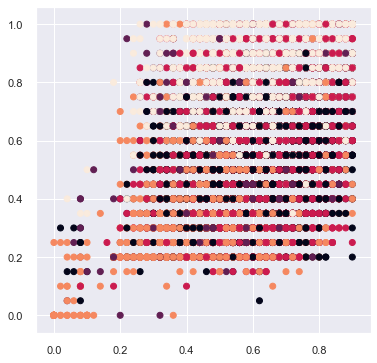

In [61]:
#lets visualize the cluster in a scatter plot


# Your code here:
plt.figure(figsize=(6,6))
plt.scatter(ds_std.HSNScale, ds_std.DDPScale, c=ds.label_pca) 
plt.show()


PCA is useless here. Therefore I will delete the columns related to PCA labels, save the csv and process to exploratory analysis.

In [63]:
ds.drop(columns = "label_pca", axis=1, inplace=True)

In [64]:
ds.head(1)

,HSNS1,HSNS2,HSNS3,HSNS4,HSNS5,HSNS6,HSNS7,HSNS8,HSNS9,HSNS10,DDP1,DDP2,DDP3,DDP4,DDN1,DDN2,DDN3,DDN4,DDM1,DDM2,DDM3,DDM4,age,gender,accuracy,country,HSNScale,HSNS1_flag,HSNS2_flag,HSNS3_flag,HSNS4_flag,HSNS5_flag,HSNS6_flag,HSNS7_flag,HSNS8_flag,HSNS9_flag,HSNS10_flag,DDP1_flag,DDP2_flag,DDP3_flag,DDP4_flag,DDN1_flag,DDN2_flag,DDN3_flag,DDN4_flag,DDM1_flag,DDM2_flag,DDM3_flag,DDM4_flag,label_psy_only,label_all_features
0,2,4,5,1,4,5,4,3,3,2,1,1,4,4,2,1,1,1,1,2,2,1,37,2,98,PT,0.62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2


In [65]:
#save to csv for exploration
#ds.to_csv("C:/Users/tvpia/Desktop/Final project/final-project/your-project/Datasets/ds_explore.csv")